## 2. Redes Neurais

### Objetivos

  - Conhecer e praticar Redes Neurais Convolucionais
  - Conhecer uma intuição sobre Convolução, Pooling 
  - Praticar a classificação de objeto usando framework TensorFlow
  

## Redes Neurais Convolucionais

A Redes Neurais Convolucionais ou CNN (Convolutional Neural Network) ou até mesmo ConvNet, são redes neurais de aprendizado profundo, `Deep Learning` muito utilizadas na área de Visão Computacional `classificação`,`detecção de objetos` ou `segmentação semântica`.



### Diferença de MLP para CNN

- Em uma rede MLP, cada pixel é tratado de forma isolada, sem considerar os demais pixels, dificultando a caracterização de features mais complexas. Não é levado em consideração se o pixel está na borda ou centro da imagem. Em um CNN o processo de convolução leva em consideração esta condição. 

- Outro ponto importante está relacionado a quantidade de parâmetros para treinamento para uma imagem. Exemplo: uma imagem de 400x600 na escala de cinza e 100 neurônios na primeira camada. Parâmetros = (400x600*100 +100) = 24.000.100 de parâmetros para treinamento, apenas na primeira camada.


<img src="flatten.png" width="400p">

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


model = keras.Sequential([
    layers.Flatten(input_shape=(600,400)),
    layers.Dense(units=100)
])

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 240000)            0         
_________________________________________________________________
dense (Dense)                (None, 100)               24000100  
Total params: 24,000,100
Trainable params: 24,000,100
Non-trainable params: 0
_________________________________________________________________


## Convolução

A **convolução**  permite uma **filtragem no domínio espacial**. Esse processo ocorre com a aplicação de **filtros** (pequenas matrizes), posicionadas sob cada pixel da imagem. Estes filtros, normalmente, são chamados de **kernels (ou núcleos)**. O resultado final do valor do pixel é calculado através de um **produto de convolução**.

Normalmente os **kernels** são matrizes 3x3. E os pesos são ajustados a cada iteração pelo **backpropagation**


<img src="same_padding_no_strides.gif">


<img src="convolution.png">


<img src="conv3d.gif">


<img src="convexp.png">

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


model = keras.Sequential([
    layers.Conv2D(100, (3, 3), activation='relu', input_shape=(400,600, 3)),
])

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 398, 598, 100)     2800      
Total params: 2,800
Trainable params: 2,800
Non-trainable params: 0
_________________________________________________________________


## Pooling

A camada de `pooling` é semelhante a camada de convolução, mas a matriz de saída é uma redução da camada de entrada, por consequência a potência computacional diminui, além disso, é nesta etapa que são extraídas as característica `features` mais importantes da imagem. 

O pooling mais comum é utilizando um kernel 2x2, e um passo `stride` de 2, por consequência a imagem de saída terá a metade da imagem de entrada. A operação de pooling irá selecionar dentro da janela do kernel o valor que será aplicado na próxima camada, pode ser o maior valor `Maxpooling()` ou a média `AveragePooling()`

<img src="pooling.png">


<img src="poolingexp.png">

<img src="convnet.png">

In [11]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers

In [12]:
# Importa o dataset Fashion Mnist
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

#normaliza os dados para o pixel ficar com valores entre 0 e 
train_images = train_images / 255.0
test_images = test_images / 255.0
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [13]:
train_images = train_images.reshape(-1,28,28,1)
train_images.shape
test_images = test_images.reshape(-1,28,28,1)
test_images.shape

(10000, 28, 28, 1)

In [14]:
from tensorflow.keras import layers

model = keras.Sequential([
    
    layers.Conv2D(30, (3,3), activation='relu', input_shape=(28, 28,1)),
    layers.MaxPooling2D((2,2)),
 
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])


model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 30)        300       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 30)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 5070)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               507100    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1010      
Total params: 508,410
Trainable params: 508,410
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

epochs_hist = model.fit(train_images, train_labels, epochs=3)


Epoch 1/3
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2023 - accuracy: 0.9258
Epoch 2/3
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1744 - accuracy: 0.9350
Epoch 3/3
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1497 - accuracy: 0.9452


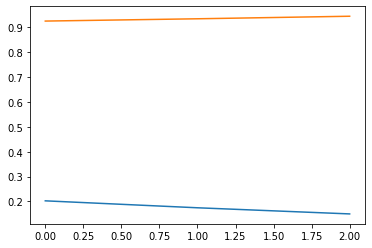

In [17]:
import pandas as pd

history_df = pd.DataFrame(epochs_hist.history)

history_df['loss'].plot();
history_df['accuracy'].plot();


In [18]:
#Validadção
train_loss, train_acc = model.evaluate(train_images,  train_labels, verbose=2)
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)


1875/1875 - 7s - loss: 0.1484 - accuracy: 0.9429
313/313 - 1s - loss: 0.2869 - accuracy: 0.9024


In [19]:
# Previsões com o modelo treinado

predictions = model.predict(test_images)

In [30]:
#Vericação dos itens preditos

item = 4

print("\nClasse predita foi {} com {:2.0f}%. Classe correta é {}, {}.".format(np.argmax(predictions[item]), 
                                                                 100*np.max(predictions[item]),
                                                                 test_labels[item], 
                                                                 class_names[test_labels[item]]))

a=100*np.max(predictions[item])


Classe predita foi 0 com 99%. Classe correta é 6, Shirt.


In [31]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

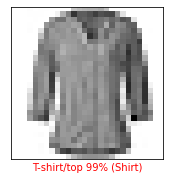

In [32]:
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(item, predictions, test_labels, test_images)
plt.show()

## Desafio1

Implemente uma rede LeNet-5.

A leNet-5 foi publicada por leCun em 1998. E é composta basicamente por:


<img src="lenet.png">


- Convolutional Layers (CONV);
- Pooling Layers (POOL);
- Fully-Connected Layers (FC).


Um exemplo de aplicação: https://github.com/gary30404/convolutional-neural-network-from-scratch-python


## Desafio 2 

Comente quais alterações você faria na rede LeNet-5?

Resposta: 





## Desafio 3 

Implemente a rede AlexNet:


<img src="AlexNet-1.png">


paper: https://proceedings.neurips.cc/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf

![](img/AlexNet-1.png)

In [3]:
### Implemente sua resposta

